### Example: Construct HF dataset

Loads a sample dataset with existing images, etc. and then constructs a new dataset with new query/answer pairs for a set of images 

In [ ]:
#add your HF token with write access
#How to get: https://huggingface.co/docs/hub/en/security-tokens
HF_token = 'hf_----'
from huggingface_hub import login
login(token=HF_token)

In [24]:
from datasets import load_dataset, Dataset, Features, Value
from datasets import Image as DatasetsImage
from tqdm.notebook import tqdm

import os
import matplotlib.pyplot as plt

# Function to plot a grid of images
def plot_image_grid(images, cols=5):
    rows = len(images) // cols + (1 if len(images) % cols > 0 else 0)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    axes = axes.flatten()
    
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    
    for ax in axes[len(images):]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()
    
def add_data_entry(dataset_entries, image=None, query='', answer='', pdf_name='', orig_caption=''):
    """Add a new entry to the dataset list."""
    try:
        dataset_entries.append({
            'image': image,
            'query': query,
            'answer': answer,
            'pdf_name': pdf_name,
            'orig_caption': orig_caption,
            #add more as you see fit
            
        })
    except Exception as e:
        print("Failed to add data entry:")
        print(f"Error: {e}")

    return dataset_entries


def create_dataset(dataset_entries):
    """Create a Hugging Face dataset from accumulated entries."""
    features = Features({
        'image': DatasetsImage(),
        'query': Value('string'),
        'answer': Value('string'),
        'pdf_name': Value('string'),
        'orig_caption': Value('string'),
        #add more as you see fit
        
    })

    column_data = {
        'image': [],
        'query': [],
        'answer': [],
        'pdf_name': [],
        'orig_caption': [],
        #add more as you see fit
    }

    for entry in tqdm(dataset_entries):
        try:
            column_data['image'].append(entry['image'])
            column_data['query'].append(entry['query'])
            column_data['answer'].append(entry['answer'])
            column_data['pdf_name'].append(entry['pdf_name'])
            column_data['orig_caption'].append(entry['orig_caption'])
            #add more as you see fit
            
        except Exception as e:
            print("Failed to add dataset entry in create_dataset:")
            print(f"Error: {e}")

    dataset = Dataset.from_dict(column_data, features=features)
    return dataset


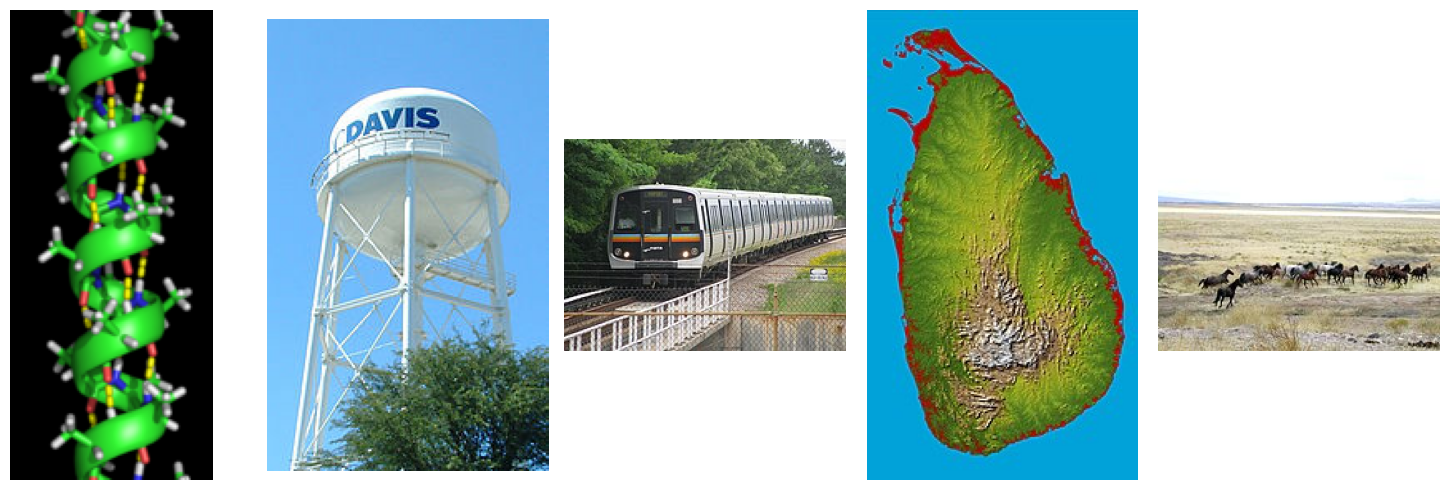

In [26]:
# Load a sample dataset
#original_dataset = load_dataset('lamm-mit/logic_and_reasoning-vision_V5')
original_dataset = load_dataset('lamm-mit/Cephalo-Wikipedia-Materials')

# Take 5 samples from it
sampled_dataset = original_dataset['train'].shuffle(seed=42).select(range(5))

# Prepare the images for plotting
images = [sample['image'] for sample in sampled_dataset]

# Plot the image grid
plot_image_grid(images)

In [31]:
HF_ID='lamm-mit' #update to your own HF ID 
new_dataset_name='test_dataset'

#here we create a list of images from the sampled_dataset
images = [sample['image'] for sample in sampled_dataset]

#same for original captions
orig_captions = [sample['orig_caption'] for sample in sampled_dataset]

# Prepare new dataset entries
new_dataset_entries = []

queries=['Query 1', 'Query 2', 'Query 3', 'Query 4', 'Query 5',   ]
answers=['Answer 1', 'Answer 2', 'Answer 3', 'Answer 4', 'Answer 5',   ]

for i, (image, orig_caption) in tqdm(enumerate(zip(images, orig_captions))):
   
    # Add data entry with placeholders for query and answer
    add_data_entry(new_dataset_entries, image, query=queries[i], answer=answers[i], 
                   pdf_name='<NAME OF PDF>', #not included in this particular dataset
                   orig_caption=orig_caption)

# Create the new dataset
new_dataset = create_dataset(new_dataset_entries)

# Save to disk
new_dataset.save_to_disk(f'{new_dataset_name}')

# Push to Hugging Face Hub
new_dataset.push_to_hub(f"{HF_ID}/{new_dataset_name}", 
                        #private=True,
                       )

print("Dataset created and pushed to Hugging Face Hub successfully.")

0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saving the dataset (0/1 shards):   0%|          | 0/5 [00:00<?, ? examples/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/419 [00:00<?, ?B/s]

Dataset created and pushed to Hugging Face Hub successfully.

### It should look like this

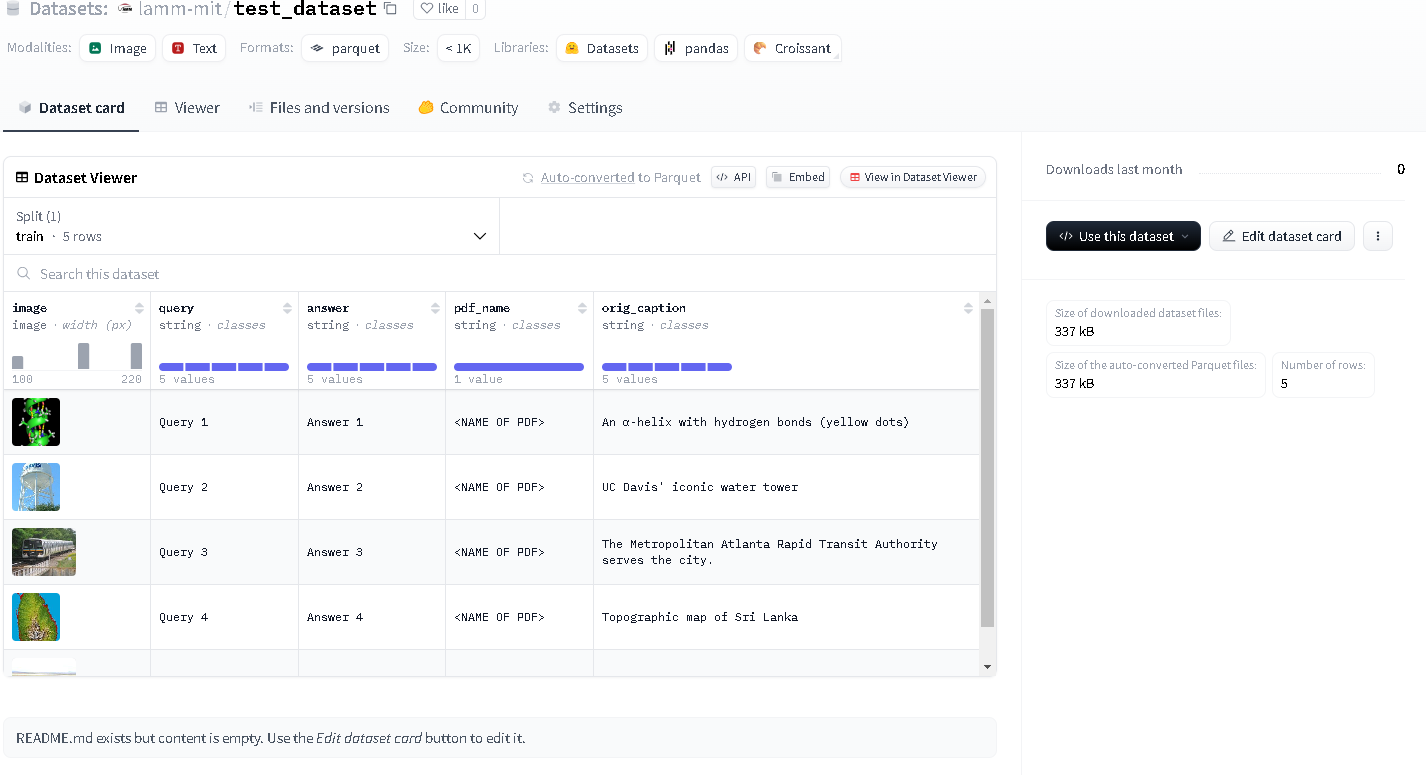

### Load the dataset

In [33]:
#load from HF hub
new_data_set = load_dataset(f'{HF_ID}/{new_dataset_name}')

#load from disk
new_dataset = load_from_disk(f'{new_dataset_name}')


In [34]:
new_dataset

Dataset({
    features: ['image', 'query', 'answer', 'pdf_name', 'orig_caption'],
    num_rows: 5
})

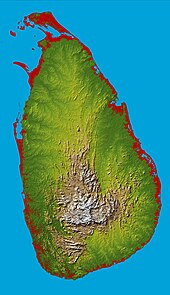

'Query 4'

'Answer 4'

In [42]:
i=3
display (new_dataset['image'][i], new_dataset['query'][i], new_dataset['answer'][i],) 